**animelist.csv** есть список всех аниме, зарегистрированных пользователем с соответствующим счетом, статусом просмотра и количеством просмотренных эпизодов.
1. user_id: неидентифицируемый случайно сгенерированный идентификатор пользователя.
2. anime_id: идентификатор аниме в MyAnimeList. (например, 1).
3. rating: оценка от 1 до 10, данная пользователем. 0, если пользователь не назначил оценку. (например, 10)
4. watching_status: идентификатор состояния этого аниме в списке аниме этого пользователя. (например, 2)
5. watched_episodes: количество серий, просмотренных пользователем. (например, 24)

<h1>anime.csv csv содержит общую информацию о каждом аниме (17.562 различных аниме), такую ​​как жанр, статистика, студия и т. д. Этот файл имеет следующие столбцы:
</h1>
 1. MAL_ID: Идентификатор аниме MyAnimelist. (например, 1)

2.   Name: полное название аниме. (например, Ковбой Бибоп)
3. Score: средняя оценка аниме, данная всеми пользователями в базе данных MyAnimelist. (например, 8,78)
4. Genres: список жанров этого аниме, разделенных запятыми. (например, боевик, приключения, комедия, драма, научная фантастика, космос)
5. English name: полное название аниме на английском языке. (например, Cowboy Bebop)
6. Japanese name: полное имя аниме на японском языке. (например, カウボーイビバップ)
7. Type: ТВ, фильм, OVA и т. д. (например, ТВ)
8. Episodes: количество глав. (например, 26)
9. Aired: дата трансляции. (например, с 3 апреля 1998 г. по 24 апреля 1999 г.)
10. Premiered: премьера сезона. (например, весна 1998 г.)
11. Producers: список производителей, разделенных запятыми (например, Bandai Visual)
12. Licensors: список лицензиаров, разделенных запятыми (например, Funimation, Bandai Entertainment)
13. Studios: список студий, разделенных запятыми (например, Sunrise)
14. Source: манга, ранобэ, книга и т. д. (например, оригинал)
15. Duration: продолжительность аниме на эпизод (например, 24 мин. на эпизод).
16. Rating: возрастной уровень (например, R - 17+ (насилие и ненормативная лексика))
17. Ranked: позиция, основанная на счете. (например, 28)
18. Popularity: позиция, основанная на количестве пользователей, которые добавили аниме в свой список. (например, 39)
19. Members: количество участников сообщества, входящих в «группу» этого аниме. (например, 1251960)
20. Favorites: количество пользователей, которые добавили аниме в «избранное». (например, 61 971)
21. Watching: количество пользователей, которые смотрят аниме. (например, 105808)
22. Completed: количество пользователей, завершивших аниме. (например, 718161)
23. On-Hold: количество пользователей, у которых аниме находится в режиме удержания. (например, 71513)
24. Dropped: количество пользователей, которые удалили аниме. (например, 26678)
25. Plan to Watch: количество пользователей, которые планируют посмотреть аниме. (например, 329800)
26. Score-10: количество пользователей, набравших 10 баллов. (например, 229170)
27. Score-9: количество пользователей, набравших 9 баллов. (например, 182126)
28. Score-8: количество пользователей, набравших 8 баллов. (например, 131625)
29. Score-7: количество пользователей, набравших 7 баллов. (например, 62330)
30. Score-6: количество пользователей, набравших 6 баллов. (например, 20688)
31. Score-5: количество пользователей, набравших 5 баллов. (например, 8904)
32. Score-4: количество пользователей, набравших 4 балла. (например, 3184)
33. Score-3: количество пользователей, набравших 3 балла. (например, 1357)
34. Score-2: количество пользователей, набравших 2 балла. (например, 741)
35. Score-1: количество пользователей, набравших 1 балл. (например, 1580)





<h1><b>Импорт Библиотек</b></h1>

Библиотека implicit используется для прогнозирования действий пользователя на основе поведения других пользователей с аналогичными интересами. Она позволяет создавать рекомендательные системы, которые помогают делать персонализированные рекомендации товаров или контента.

In [1]:
!pip install implicit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 52.1 MB/s eta 0:00:00


Surprise — это библиотека на Python, предназначенная для построения и анализа рекомендательных систем. Она поддерживает различные алгоритмы коллаборативной фильтрации и позволяет легко экспериментировать с ними.

In [2]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357291 sha256=bf678683f168b0e0b74fb9897175c91dfd1b06af6a3e3bc83899f4f01c89136f
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [3]:
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import json
import gc
from surprise import Dataset, Reader, SVD, KNNBasic, SlopeOne, CoClustering
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse, mae
from implicit.als import AlternatingLeastSquares
from implicit.bpr import BayesianPersonalizedRanking
from sklearn.metrics import mean_squared_error
from gensim.models import Word2Vec
import pickle
from scipy.sparse import csr_matrix,load_npz
import torch
from torch import nn

Подключение к Google Disk

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


Загрузка данных

In [5]:
# Загрузка данных об аниме и списках аниме пользователей
anime = pd.read_csv('/content/drive/My Drive/data_anime/anime.csv')
anime = anime.rename(columns={
    'MAL_ID': 'anime_id'})
# Посмотрим на структуру данных
anime.head()

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [6]:
animelist = pd.read_csv('/content/drive/My Drive/data_anime/animelist.csv')

In [7]:
animelist.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [8]:
# Заменяем пропущенные оценки на 0 (или другой подход, например, удаление)
animelist['rating'] = animelist['rating'].fillna(0)
animelist['rating'].isnull().sum()

# Преобразуем оценки к числовому типу (на случай, если они сохранены как строки)
animelist['rating'] = animelist['rating'].astype(float)

In [9]:
# Определение количества уникальных пользователей и аниме
num_users = animelist['user_id'].nunique()
num_anime = animelist['anime_id'].nunique()

print(f"Количество уникальных пользователей: {num_users}")
print(f"Количество уникальных аниме: {num_anime}")

Количество уникальных пользователей: 315
Количество уникальных аниме: 7920


In [10]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   anime_id       17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [11]:
# Удаляем некорректные символы и преобразуем в числа
anime['Score'] = anime['Score'].str.replace('[^0-9.]', '', regex=True)
anime['Score'] = pd.to_numeric(anime['Score'], errors='coerce')
# Заполнение пропущенных оценок средним значением
anime['Score'] = anime['Score'].fillna(anime['Score'].mean())
anime = anime.dropna(subset=['Score'])

In [12]:
genre_dummies = anime['Genres'].str.get_dummies(sep=', ')
anime['Genres'] = anime['Genres'].fillna('')  # Заменяем пропуски в жанрах
# Объединяем с основными данными
anime_with_genres = pd.concat([anime, genre_dummies], axis=1)

anime_with_genres.head()

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,0,1,0,0,0,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,0,1,0,0,0,0,0,0,0,0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,0,0,0,0,0,0,0,0,0,0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,0,0,0,0,1,0,0,0,0,0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,0,0,0,0,1,0,0,0,0,0


Объеденение данных:
 Объединенный набор данных теперь содержит пользовательские оценки, статус просмотра и просмотренные эпизоды, также с информацией о самом аниме (жанры, средний балл и т. д.). Это важно для рекомендательных систем, поскольку позволяет алгоритмам учитывать как предпочтения пользователя, так и характеристики аниме.

**2. `merged_data = merged_data[merged_data['rating'] > 0]`**

* Отфильтровывает строки, в которых рейтинг пользователя равен 0 или меньше. Рейтинги 0 могут указывать на то, что пользователь не оценил аниме, или в данных может быть ошибка.
* **Преимущество:** Удаление нулевых оценок гарантирует, что модель рекомендаций будет работать с содержательными отзывами пользователей. Алгоритмы менее чувствительны к рейтингам, представляющим отсутствие предпочтений, и менее склонны к ошибкам.

**3. `merged_data = merged_data[merged_data['watched_episodes'] > 0]`**

* **Отфильтровывает:** строки, в которых пользователь не посмотрел ни одной серии. Пользователь с нулевым количеством просмотренных серий мог вообще не взаимодействовать с аниме, что делает его рейтинг бессмысленным.
* **Преимущество:** Удаляет возможно поврежденные или нерелевантные данные, повышая точность модели рекомендаций.

 Предоставленный код подготавливает данные для обучения модели рекомендаций. Операция слияния объединяет взаимодействия пользователя с аниме с подробностями аниме, в то время как операции фильтрации удаляют потенциально проблемные точки данных (отсутствующие оценки, нулевые просмотренные эпизоды, отсутствующие оценки после первоначального подсчета), повышая надежность окончательной модели. Очищенный и объединенный набор данных (`merged_data`) теперь готов к проектированию признаков, выбору модели и обучению.

In [13]:
merged_data = pd.merge(animelist, anime_with_genres, on="anime_id", how="inner")
merged_data = merged_data[merged_data['rating'] > 0]  # Удаление пользователей без рейтинга
merged_data = merged_data[merged_data['watched_episodes']>0]
merged_data = merged_data.dropna(subset=['rating'])

In [14]:
merged_data = merged_data.drop(['Type','Studios'], axis=1)
merged_data.head()

,user_id,anime_id,rating,watching_status,watched_episodes,Name,Score,Genres,English name,Japanese name,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,0,67,9.0,1,1,Basilisk: Kouga Ninpou Chou,7.58,"Action, Adventure, Historical, Supernatural, R...",Basilisk,バジリスク 甲賀忍法帖,...,0,0,0,0,1,0,0,0,0,0
1,0,6702,7.0,1,4,Fairy Tail,7.68,"Action, Adventure, Comedy, Magic, Fantasy, Sho...",Fairy Tail,FAIRY TAIL（フェアリーテイル）,...,0,0,0,0,0,0,0,0,0,0
2,0,242,10.0,1,4,Gokusen,7.42,"Slice of Life, Comedy, Drama, School, Josei",The Gokusen,ごくせん,...,1,0,0,0,0,0,0,0,0,0
5,0,24,9.0,1,5,School Rumble,7.94,"Comedy, Romance, School, Shounen",School Rumble,スクールランブル,...,0,0,0,0,0,0,0,0,0,0
7,0,4722,8.0,1,4,Skip Beat!,8.13,"Comedy, Drama, Romance, Shoujo",Skip Beat!,スキップ・ビート！,...,0,0,0,0,0,0,0,0,0,0


In [15]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53159 entries, 0 to 101297
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           53159 non-null  int64  
 1   anime_id          53159 non-null  int64  
 2   rating            53159 non-null  float64
 3   watching_status   53159 non-null  int64  
 4   watched_episodes  53159 non-null  int64  
 5   Name              53159 non-null  object 
 6   Score             53159 non-null  float64
 7   Genres            53159 non-null  object 
 8   English name      53159 non-null  object 
 9   Japanese name     53159 non-null  object 
 10  Episodes          53159 non-null  object 
 11  Aired             53159 non-null  object 
 12  Premiered         53159 non-null  object 
 13  Producers         53159 non-null  object 
 14  Licensors         53159 non-null  object 
 15  Source            53159 non-null  object 
 16  Duration          53159 non-null  object 
 1

In [16]:
# Создаем маппинг для ID пользователей и аниме
user_id_mapping = {id_: idx for idx, id_ in enumerate(merged_data['user_id'].unique())}
anime_id_mapping = {id_: idx for idx, id_ in enumerate(merged_data['anime_id'].unique())}

# Добавляем маппинг в объединенные данные
merged_data['user_id_mapped'] = merged_data['user_id'].map(user_id_mapping)
merged_data['anime_id_mapped'] = merged_data['anime_id'].map(anime_id_mapping)

# Преобразуем в матрицу рейтингов
user_anime_matrix = merged_data.pivot_table(
    index='user_id_mapped',
    columns='anime_id_mapped',
    values='rating',
    aggfunc='mean'
).fillna(0)

# Выводим форму матрицы для проверки
print("Размер матрицы:", user_anime_matrix.shape)

Размер матрицы: (301, 5782)


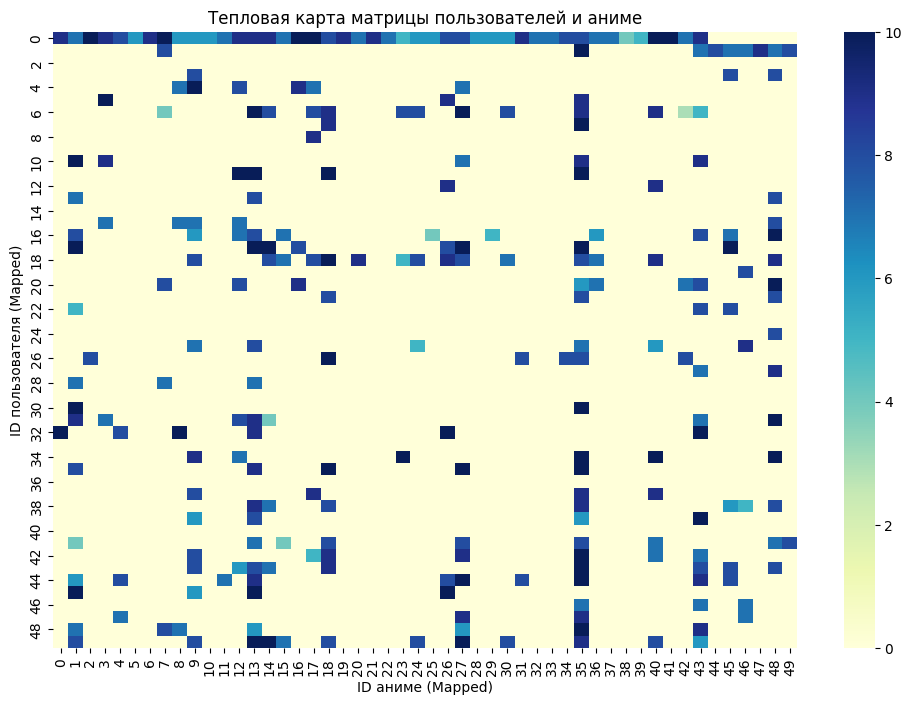

In [17]:
# Ограничиваем размер матрицы для визуализации, чтобы график был читабельным
sample_matrix = user_anime_matrix.iloc[:50, :50]  # Выбираем первые 50 пользователей и аниме

# Создаём тепловую карту
plt.figure(figsize=(12, 8))
sns.heatmap(sample_matrix, cmap="YlGnBu", cbar=True)

# Настройка графика
plt.title("Тепловая карта матрицы пользователей и аниме")
plt.xlabel("ID аниме (Mapped)")
plt.ylabel("ID пользователя (Mapped)")

# Отображение графика
plt.show()

### Описание графика:

Данный график представляет собой **тепловую карту**, визуализирующую взаимодействие пользователей с аниме. Он построен на основе первых 50 пользователей и первых 50 аниме из матрицы `user_anime_matrix`.

#### Элементы графика:
1. **Оси:**
   - **Ось X (ID аниме)** — отображает уникальные идентификаторы аниме после маппинга (например, индексации).
   - **Ось Y (ID пользователей)** — отображает уникальные идентификаторы пользователей после маппинга.

2. **Точки на карте:**
   - **Ячейки тепловой карты** представляют взаимодействие между пользователем (по оси Y) и аниме (по оси X).
   - Значение каждой ячейки — это количество взаимодействий (например, оценок или просмотров), которое пользователь оставил для данного аниме.

3. **Цветовая шкала:**
   - **Темные области (темно-синий цвет)** — низкое значение взаимодействий или их отсутствие. Например, пользователь не смотрел данное аниме или не оценивал его.
   - **Светлые области (желтоватые цвета)** — высокое значение взаимодействий. Например, пользователь оценил это аниме высоко или часто его смотрел.

#### Что показывает тепловая карта:
- Карта визуализирует **распределение взаимодействий** между пользователями и аниме.
- **Светлые области** помогают быстро определить, какие пользователи наиболее активно взаимодействуют с конкретными аниме.
- **Темные области** указывают на отсутствие взаимодействий, что может быть полезно для:
  - Выявления пробелов в данных.
  - Определения менее популярных аниме или менее активных пользователей.
  - Анализа паттернов взаимодействий (например, схожих предпочтений пользователей).

#### Выводы:
- Вы можете заметить **кластеры светлых ячеек**, которые укажут на группы пользователей, интересующихся схожими аниме.
- Тёмные области подтверждают, что большинство пользователей взаимодействуют с небольшим количеством аниме.
Это типичный сценарий для рекомендательных систем и указывает на необходимость продвинутых алгоритмов для работы с разреженными данными.

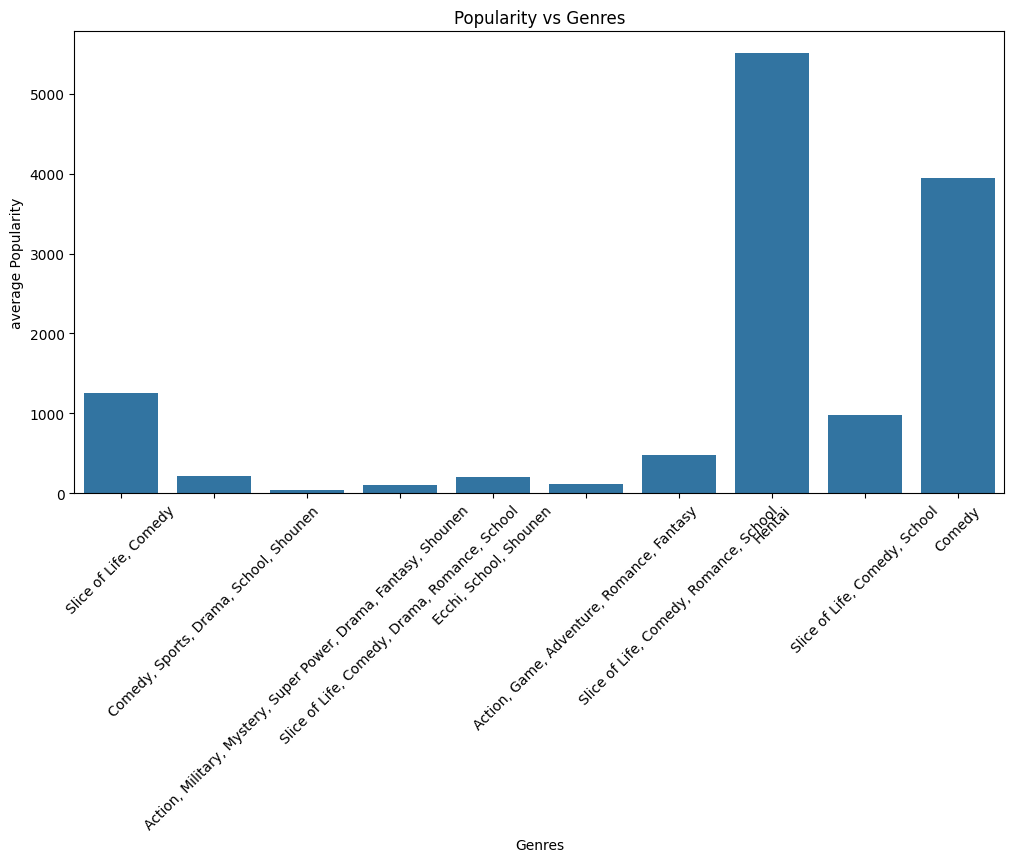

In [18]:
genre_counts = merged_data['Genres'].value_counts().nlargest(10).index
df_genre = merged_data[merged_data['Genres'].isin(genre_counts)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Genres', y='Popularity', data=df_genre, estimator='mean', errorbar=None)
plt.xticks(rotation=45)
plt.title('Popularity vs Genres')
plt.ylabel('average Popularity')
plt.xlabel('Genres')
plt.show()

In [19]:
# Вычисляем средний рейтинг для каждого аниме, исключая NaN и нулевые значения
average_ratings = merged_data.groupby('anime_id')['rating'].mean().reset_index()

# Фильтруем аниме с рейтингом 0 или NaN
average_ratings = average_ratings[average_ratings['rating'] > 0]

# Объединяем это с данными о названиях аниме
anime_with_ratings = anime.merge(average_ratings, on='anime_id', how='left')

# Переименовываем столбец с рейтингом для удобства
anime_with_ratings = anime_with_ratings.rename(columns={'rating': 'average_rating'})
anime_with_ratings = anime_with_ratings.dropna(subset=['average_rating'])

# Выводим список аниме с их средними рейтингами, исключая те, у которых рейтинг 0 или NaN
anime_with_ratings[['Name', 'average_rating']].sort_values(by='average_rating', ascending=False)


,Name,average_rating
8916,By Your Side,10.0
16193,Hyperventilation,10.0
1577,Muteki Kanban Musume,10.0
15463,Sword Art Online: Alicization - Recollection,10.0
454,Gensoumaden Saiyuuki Movie: Requiem - Erabarez...,10.0
...,...,...
12353,Saimin Class,1.0
4555,Bondage Game: Shinsou no Reijoutachi - Shinsou...,1.0
2934,Tenkuu Danzai Skelter+Heaven,1.0
16777,Kohakuiro no Hunter The Animation,1.0


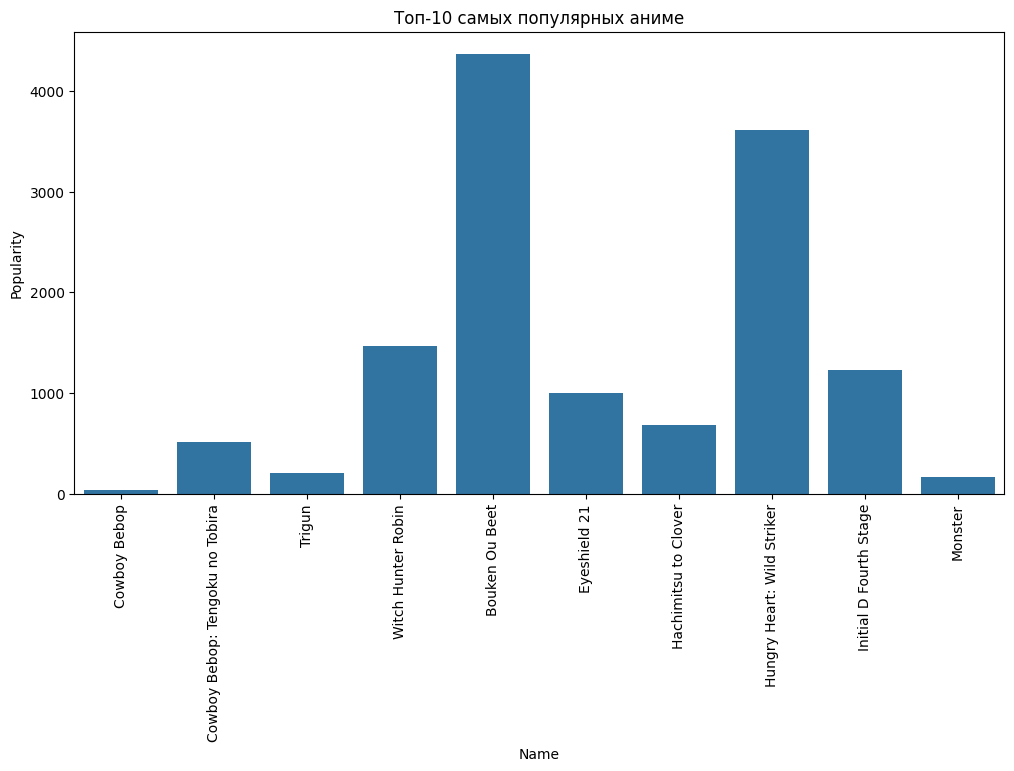

In [20]:
# Визуализация топ-N рекомендаций
top_anime = anime.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Popularity', data=top_anime)
plt.title('Топ-10 самых популярных аниме')
plt.xticks(rotation=90)
plt.show()

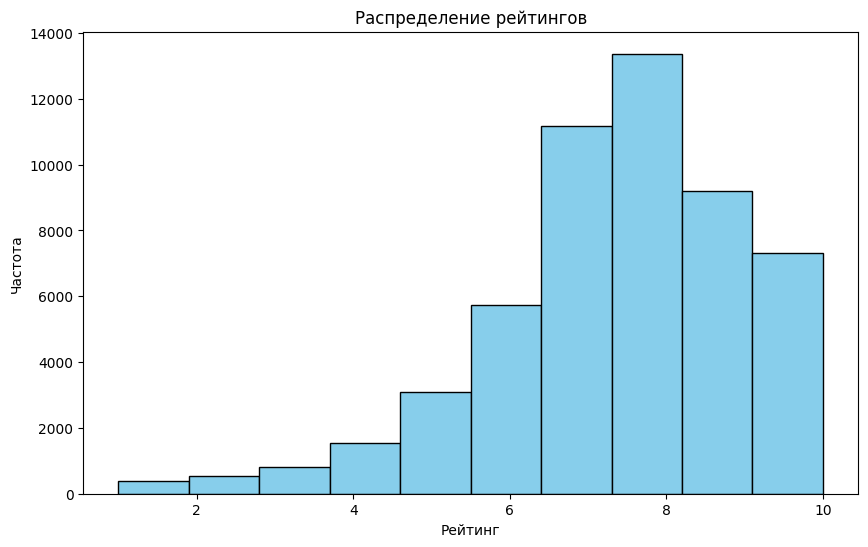

<ipython-input-25-6fdfb2303bcf>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  anime['Year'] = pd.to_datetime(anime['Aired'], errors='coerce').dt.year


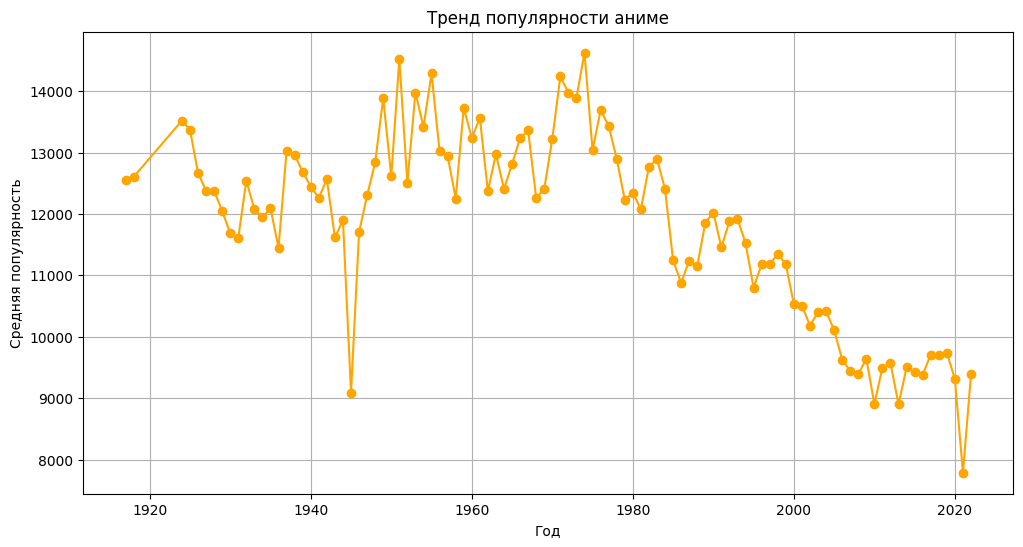

In [25]:
# 1. Распределение рейтингов
plt.figure(figsize=(10, 6))
merged_data['rating'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Распределение рейтингов')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.show()

# 2. Тренд популярности аниме по времени
anime['Year'] = pd.to_datetime(anime['Aired'], errors='coerce').dt.year
popularity_trend = anime.groupby('Year')['Popularity'].mean()
plt.figure(figsize=(12, 6))
plt.plot(popularity_trend, marker='o', color='orange')
plt.title('Тренд популярности аниме')
plt.xlabel('Год')
plt.ylabel('Средняя популярность')
plt.grid()
plt.show()


In [ ]:
def get_baseline_recommendations(anime_data, animelist_data, top_n=100):
    """
    Генерирует базовые рекомендации, учитывая только аниме с надежными средними оценками.

    :param anime_data: DataFrame с информацией об аниме.
    :param animelist_data: DataFrame с оценками пользователей.
    :param top_n: Количество лучших рекомендаций для возврата.
    :return: Список из top_n аниме, отсортированных по средней нормализованной оценке.
    """
    # Группируем оценки пользователей по аниме
    ratings = animelist_data.groupby('anime_id')['rating'].agg(['mean', 'count'])
    ratings = ratings.rename(columns={'mean': 'avg_rating', 'count': 'rating_count'})

    # Исключаем аниме с менее чем 1 оценками
    ratings = ratings[ratings['rating_count'] > 1]

    # Соединяем средние оценки с данными об аниме
    anime_with_ratings = anime_data.merge(ratings, left_on='anime_id', right_index=True)

    # Вычисляем разницу между оценкой аниме и его средним
    anime_with_ratings['adjusted_score'] = anime_with_ratings['avg_rating'] - anime_with_ratings['avg_rating'].mean()

    # Сортируем по скорректированному рейтингу и выбираем топ-N
    top_anime = anime_with_ratings.sort_values('adjusted_score', ascending=False).head(top_n)

    # Выбираем только нужные столбцы для вывода
    return top_anime[['anime_id', 'Name', 'adjusted_score', 'avg_rating', 'rating_count']]


# Генерация рекомендаций
baseline_recommendations = get_baseline_recommendations(anime_data=merged_data, animelist_data=animelist, top_n=100)

# Преобразование DataFrame в список словарей
baseline_recommendations_list = baseline_recommendations.to_dict(orient='records')

# Сохранение в JSON
with open('drive/MyDrive/data_anime/baseline_new.json', 'w') as f:
    json.dump(baseline_recommendations_list, f, ensure_ascii=False, indent=4)

In [ ]:
merged_data.to_parquet("drive/MyDrive/data_anime/merged_data.parquet", index=False)

In [ ]:
#  del animelist, anime_with_ratings, average_ratings

In [ ]:
# gc.collect()


12037

In [ ]:
# Матрица жанров
genre_matrix = anime_with_genres.iloc[:, -len(genre_dummies.columns):]

# Косинусное сходство
cosine_sim = cosine_similarity(genre_matrix)

# Рекомендация на основе жанров
def recommend_by_genres(anime_id, top_n=5):
    idx = anime_with_genres[anime_with_genres['anime_id'] == anime_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    anime_indices = [i[0] for i in sim_scores[1:top_n + 1]]
    return anime_with_genres.iloc[anime_indices][['anime_id', 'Name']].to_dict(orient='records')


In [ ]:
recommend_by_genres(5)

[{'anime_id': 1156, 'Name': 'I: Wish You Were Here'},
 {'anime_id': 3602, 'Name': 'Ginga Tetsudou 999: Eternal Fantasy'},
 {'anime_id': 10161, 'Name': 'No.6'},
 {'anime_id': 17269, 'Name': 'Captain Herlock'},
 {'anime_id': 483, 'Name': 'Kurau Phantom Memory'}]

Content Based Model

In [ ]:
def build_content_model(anime_data, top_n=100):
    tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix = tfidf.fit_transform(anime_data['Genres'].fillna(''))
    similarity = cosine_similarity(tfidf_matrix)
    recommendations = {}
    for idx, row in anime_data.iterrows():
        sim_scores = list(enumerate(similarity[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
        recommendations[int(row['anime_id'])] = [int(anime_data.iloc[i[0]]['anime_id']) for i in sim_scores]
    return recommendations

# Создание модели
content_based_model = build_content_model(anime)

# Сохранение в файл JSON
with open('content_based.json', 'w') as f:
    json.dump(content_based_model, f)

print("Модель сохранена в content_based.json")

Модель сохранена в content_based.json


In [ ]:
# Преобразование жанров с помощью TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(anime['Genres'])

# Вычисляем косинусную схожесть
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Сохранение модели
with open('content_based.pkl', 'wb') as f:
    pickle.dump(cosine_sim, f)

# Функция для рекомендаций
def recommend_content_based(anime_id, cosine_sim=cosine_sim, top_n=10):
    idx = anime_id_mapping.get(anime_id)
    if idx is None:
        return []

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]

    anime_indices = [i[0] for i in sim_scores]
    return anime.iloc[anime_indices][['anime_id', 'Name']].to_dict(orient='records')

> По причине что content_based.pkl весит более 2 GB не стала его использовать в FastApi



In [ ]:
recommend_content_based(8)

[{'anime_id': 448, 'Name': 'Tenjou Tenge: The Ultimate Fight'},
 {'anime_id': 760, 'Name': 'Tenjou Tenge: The Past Chapter'},
 {'anime_id': 1010,
  'Name': 'Ranma ½: Chou Musabetsu Kessen! Ranma Team vs. Densetsu no Houou'},
 {'anime_id': 1007, 'Name': 'Ranma ½ OVA'},
 {'anime_id': 5493, 'Name': 'Ranma ½: Akumu! Shunmin Kou'},
 {'anime_id': 2523, 'Name': 'Izumo: Takeki Tsurugi no Senki'},
 {'anime_id': 4437, 'Name': 'Naruto: Shippuuden Movie 2 - Kizuna'},
 {'anime_id': 961, 'Name': 'Virtua Fighter'},
 {'anime_id': 16345, 'Name': 'Ninkuu: Knife no Bohyou'},
 {'anime_id': 504, 'Name': 'Fatal Fury: The Motion Picture'}]

<h1>Обучение моделей и выбор наилучшего для колаборативной фильтрации</h1>




In [ ]:
# Чтение данных
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(merged_data[['user_id', 'anime_id', 'rating']], reader)

# Список моделей
models = {
    "SVD": SVD(),
    "KNNBasic": KNNBasic(),
    "SlopeOne": SlopeOne(),
    "CoClustering": CoClustering()
}

# Оценка моделей
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    cv_results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    results[name] = {
        "RMSE": sum(cv_results['test_rmse']) / len(cv_results['test_rmse']),
        "MAE": sum(cv_results['test_mae']) / len(cv_results['test_mae']),
    }

# Вывод результатов
for name, metrics in results.items():
    print(f"Model: {name}, RMSE: {metrics['RMSE']:.4f}, MAE: {metrics['MAE']:.4f}")


Training SVD...
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3668  1.3716  1.3881  1.4002  1.3666  1.3787  0.0133  
MAE (testset)     1.0221  1.0376  1.0501  1.0427  1.0288  1.0363  0.0099  
Fit time          0.79    1.07    1.29    1.21    1.34    1.14    0.20    
Test time         0.07    0.11    0.10    0.10    0.07    0.09    0.02    
Training KNNBasic...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6530  1.6616  1

In [ ]:
anime_with_genres.to_parquet("drive/MyDrive/data_anime/anime_with_genres.parquet", index=False)

In [ ]:
anime.to_parquet("drive/MyDrive/data_anime/anime.parquet", index=False)

In [ ]:
# Матрица взаимодействия
interaction_matrix = merged_data.pivot(index='user_id', columns='anime_id', values='rating').fillna(0)
sparse_matrix = csr_matrix(interaction_matrix.values)

# Список моделей
models = {
    "ALS": AlternatingLeastSquares(factors=50, regularization=0.01, iterations=10),
    "BPR": BayesianPersonalizedRanking(factors=50, regularization=0.01, iterations=10)
}
best_model = None
best_rmse = float('inf')
# Оценка моделей
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(sparse_matrix)

    # Предсказание для тестового пользователя
    user_idx = 0  # Первый пользователь
    anime_indices, scores = model.recommend(user_idx, sparse_matrix[user_idx], N=10)

    # Вычисление RMSE
    actual = interaction_matrix.iloc[user_idx].values
    predicted = np.zeros_like(actual)
    for anime_idx, score in zip(anime_indices, scores):
        predicted[anime_idx] = score
    rmse_score = np.sqrt(mean_squared_error(actual, predicted))
    with open(f'{name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)
    print(f"Model: {name}, RMSE: {rmse_score:.4f}")

    # Сохраняем лучшую модель
    if rmse_score < best_rmse:
        best_rmse = rmse_score
        best_model = model

# Сохранение лучшей модели
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

Training ALS...


  0%|          | 0/10 [00:00<?, ?it/s]

Model: ALS, RMSE: 0.6806
Training BPR...


  0%|          | 0/10 [00:00<?, ?it/s]

Model: BPR, RMSE: 0.6816


По представленным результатам, лучшая модель — это **BPR** (Bayesian Personalized Ranking), с **RMSE = 0.6815**, которая дает наименьшее значение RMSE среди всех моделей.

### Причины, почему BPR — лучшая модель:

1. **RMSE (Root Mean Squared Error)**: Этот показатель измеряет среднее квадратичное отклонение между предсказанными и реальными значениями. Меньшее значение RMSE означает более точные предсказания. **BPR** имеет наименьший RMSE среди всех моделей.

2. **ALS (Alternating Least Squares)**: Эта модель близка по результатам к BPR, с RMSE = 0.6805, но все-таки чуть хуже по сравнению с BPR.

3. **SVD**: Из других моделей, **SVD** имеет RMSE = 1.3787, что существенно хуже по сравнению с BPR и ALS.

4. **KNNBasic, SlopeOne, CoClustering**: Эти модели показывают гораздо худшие результаты с RMSE от 1.4528 до 1.6442, что делает их менее подходящими по сравнению с BPR и ALS.

### Заключение:
Если основным критерием является минимизация ошибки предсказания (RMSE), то **BPR** (с наименьшим RMSE) является лучшей моделью среди использованных.

In [ ]:
from scipy.sparse import save_npz

# Сохранение sparse-матрицы в файл
save_npz('interaction_matrix_sparse.npz', sparse_matrix)
interaction_matrix.to_csv('interaction_matrix.csv', index=True)
interaction_matrix.to_parquet('interaction_matrix.parquet', index=False)


Коллаборативная фильтрация используем обученную модель

In [ ]:
def recommend_collaborative(user_id, model=best_model, sparse_matrix=sparse_matrix, top_n=10):
    # Преобразуем user_id в индекс
    user_idx = user_id_mapping.get(user_id)
    if user_idx is None:
        return []

    # Рекомендации от модели
    anime_indices, scores = model.recommend(user_idx, sparse_matrix[user_idx], N=top_n)

    recommendations = []
    for i, score in zip(anime_indices, scores):  # Используем zip для правильного отображения индекса и оценки
        anime_id = interaction_matrix.columns[i]  # Получаем id аниме по индексу
        anime_name = merged_data.loc[merged_data[merged_data['anime_id'] == anime_id].index[0], 'Name']  # Извлекаем имя аниме
        recommendations.append({
            "anime_id": anime_id,
            "Name": anime_name,
            "score": score  # Используем значение из массива scores
        })

    return recommendations


In [ ]:
recommend_collaborative(1)

[{'anime_id': 38524,
  'Name': 'Shingeki no Kyojin Season 3 Part 2',
  'score': 1.4703245},
 {'anime_id': 121, 'Name': 'Fullmetal Alchemist', 'score': 0.9528482},
 {'anime_id': 24833, 'Name': 'Ansatsu Kyoushitsu', 'score': 0.9314588},
 {'anime_id': 2904,
  'Name': 'Code Geass: Hangyaku no Lelouch R2',
  'score': 0.927682},
 {'anime_id': 30240, 'Name': 'Prison School', 'score': 0.90636945},
 {'anime_id': 30654,
  'Name': 'Ansatsu Kyoushitsu 2nd Season',
  'score': 0.90360475},
 {'anime_id': 22319, 'Name': 'Tokyo Ghoul', 'score': 0.8985248},
 {'anime_id': 10620, 'Name': 'Mirai Nikki', 'score': 0.85201085},
 {'anime_id': 27899, 'Name': 'Tokyo Ghoul √A', 'score': 0.8012652},
 {'anime_id': 9989,
  'Name': 'Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.',
  'score': 0.8012112}]

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Пример Dataset, который включает user_id, anime_id и рейтинг
class AnimeDataset(Dataset):
    def __init__(self, animelist):
        self.data = animelist[['user_id_mapped', 'anime_id_mapped', 'rating']].values

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        user_id = self.data[idx][0]
        anime_id = self.data[idx][1]
        rating = self.data[idx][2]
        return torch.tensor(user_id, dtype=torch.long), torch.tensor(anime_id, dtype=torch.long), torch.tensor(rating, dtype=torch.float)


# Создание DataLoader
dataset = AnimeDataset(animelist)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Модель для предсказания аниме
class SessionModel(nn.Module):
    def __init__(self, num_users, num_anime, embed_size=50):
        super(SessionModel, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embed_size)
        self.anime_embedding = nn.Embedding(num_anime, embed_size)
        self.rnn = nn.GRU(embed_size, embed_size, batch_first=True)
        self.fc = nn.Linear(embed_size, num_anime)  # Прогнозирование всех аниме

    def forward(self, user, anime):
        # Получение векторных представлений пользователей и аниме
        user_emb = self.user_embedding(user)
        anime_emb = self.anime_embedding(anime)

        # Объединяем эмбеддинги
        x = user_emb + anime_emb  # Просто суммируем для простоты

        # Пропускаем через RNN
        x = x.unsqueeze(1)  # Преобразуем для RNN
        _, h = self.rnn(x)

        # Прогнозируем рейтинг аниме
        out = self.fc(h.squeeze(0))  # Выходной слой
        return out

# Инициализация модели
num_users = len(animelist['user_id_mapped'])
num_anime = len(animelist['anime_id_mapped'])
model = SessionModel(num_users, num_anime)

# Определение оптимизатора и функции потерь
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()  # Модифицируем на CrossEntropy для многоклассовой классификации

# Обучение модели
for epoch in range(10):
    model.train()  # Устанавливаем модель в режим обучения
    for user, anime, rating in loader:
        optimizer.zero_grad()

        # Прогнозируем аниме
        outputs = model(user, anime)

        # Переводим рейтинг в индекс аниме для обучения (например, используем кросс-энтропию)
        loss = criterion(outputs, anime)  # Модель прогнозирует аниме на основе user и anime
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Сохранение модели
torch.save(model.state_dict(), 'session_based_model.pt')



Epoch 1, Loss: 4.031365394592285
Epoch 2, Loss: 1.1307278871536255
Epoch 3, Loss: 0.8856229782104492
Epoch 4, Loss: 0.4568476378917694
Epoch 5, Loss: 0.0987444519996643
Epoch 6, Loss: 0.1821385771036148
Epoch 7, Loss: 0.17815670371055603
Epoch 8, Loss: 0.2557927668094635
Epoch 9, Loss: 0.005506709683686495
Epoch 10, Loss: 0.023433111608028412


In [ ]:
# Простая Session-based логика
def recommend_simple_session_based(user_id, data):
    user_data = data[data["user_id"] == user_id]
    return user_data.sort_values("rating", ascending=False).head(5)[["anime_id", "Name", "Score"]]

In [ ]:
recommend_simple_session_based(1, merged_data)

,anime_id,Name,Score
167,25777,Shingeki no Kyojin Season 2,8.45
162,199,Sen to Chihiro no Kamikakushi,8.83
168,35760,Shingeki no Kyojin Season 3,8.59
179,32188,Steins;Gate: Kyoukaimenjou no Missing Link - D...,8.26
145,1735,Naruto: Shippuuden,8.16


In [ ]:
# Используем Implicit для Session-based рекомендаций

interaction_matrix = merged_data.pivot(index='user_id', columns='anime_id', values='rating').fillna(0)

# Преобразуем в формат CSR
sparse_matrix = csr_matrix(interaction_matrix.values)

# Обучаем модель
model_session = AlternatingLeastSquares(factors=50, regularization=0.01, iterations=10)
model_session.fit(sparse_matrix)

# Сохранение модели
with open('session_based.pkl', 'wb') as f:
    pickle.dump(model_session, f)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
# Функция для генерации рекомендаций
def recommend_session_based(user_id, model=model_session, sparse_matrix=sparse_matrix, top_n=10):
    # Индекс пользователя
    user_idx = user_id_mapping.get(user_id)
    if user_idx is None:
        return []

    # Генерация рекомендаций от модели
    anime_indices, scores = model.recommend(user_idx, sparse_matrix[user_idx], N=top_n)

    # Формируем список рекомендаций
    recommendations = []
    for i, score in zip(anime_indices, scores):
        anime_id = interaction_matrix.columns[i]  # Получаем id аниме по индексу
        anime_name = merged_data.loc[merged_data[merged_data['anime_id'] == anime_id].index[0], 'Name']  # Извлекаем имя аниме
        recommendations.append({
            "anime_id": anime_id,
            "Name": anime_name,
            "score": score  # Добавляем оценку
        })

    return recommendations

In [ ]:
recommendations = recommend_session_based(user_id=2, top_n=10)
for rec in recommendations:
    print(f"Anime ID: {rec['anime_id']}, Name: {rec['Name']}, Score: {rec['score']}")


Anime ID: 5114, Name: Fullmetal Alchemist: Brotherhood, Score: 0.9323247075080872
Anime ID: 11757, Name: Sword Art Online, Score: 0.9119799137115479
Anime ID: 29803, Name: Overlord, Score: 0.8804516792297363
Anime ID: 121, Name: Fullmetal Alchemist, Score: 0.8495917320251465
Anime ID: 30484, Name: Steins;Gate 0, Score: 0.8155665993690491
Anime ID: 25777, Name: Shingeki no Kyojin Season 2, Score: 0.7636907696723938
Anime ID: 11617, Name: High School DxD, Score: 0.760529637336731
Anime ID: 269, Name: Bleach, Score: 0.7524749040603638
Anime ID: 11771, Name: Kuroko no Basket, Score: 0.738052487373352
Anime ID: 223, Name: Dragon Ball, Score: 0.7115283608436584


# **Word2Vec**

Word2Vec — это популярная модель обработки естественного языка, разработанная исследователями из Google, которая преобразует слова в многомерные числовые векторы (эмбеддинги). Эти эмбеддинги отражают семантические связи между словами, что позволяет моделям понимать контекст и значение слов в предложении.

Word2Vec использует нейронные сети для обучения и представляет слова в виде плотных векторов фиксированной длины в многомерном пространстве.

In [26]:
# Подготовка данных
anime_ids = merged_data['anime_id'].astype(str)
user_watchlists = merged_data.groupby('user_id')['anime_id'].apply(lambda x: list(map(str, x)))

# Word2Vec модель
w2v_model = Word2Vec(sentences=user_watchlists, vector_size=50, window=5, min_count=1, workers=4)
user_watchlists.head()  # Убедитесь, что данные представлены как списки строк

# Векторное представление пользователя
def user_embedding(user_id):
    watchlist = user_watchlists[user_id]
    # Собрать векторы только для тех аниме, которые есть в модели
    vectors = [w2v_model.wv[str(anime)] for anime in watchlist if str(anime) in w2v_model.wv]
    if not vectors:  # Если список пуст, вернуть нулевой вектор
        print(f"No vectors found for user {user_id}. Returning zero vector.")
        return np.zeros(w2v_model.vector_size)
    return np.mean(vectors, axis=0)


print(user_embedding(2))

[-0.04829449 -0.00264513 -0.11284244  0.09972572 -0.28049916 -0.42226067
  0.2857728   0.57481223 -0.5718594  -0.14426641 -0.07962332 -0.3834267
 -0.15803644  0.0279849  -0.3100705  -0.02485262  0.23152302 -0.11420153
 -0.45100406 -0.2905861   0.09405786  0.32516715  0.5995395  -0.19176623
  0.11438937  0.1874643  -0.27923164 -0.24438353 -0.5282036   0.06723038
  0.28079775  0.07144365 -0.14063989  0.32564762 -0.1121584   0.36815193
  0.03465357 -0.0031628   0.18922968 -0.5091419   0.42049363 -0.16998908
 -0.11687082  0.007017    0.8533944   0.19590516  0.01846904 -0.45342162
  0.30701065  0.20712182]


In [27]:
def recommend_anime(user_id, top_n=10):
    # Получаем вектор пользователя
    user_vector = user_embedding(user_id)

    # Считаем схожесть с каждым аниме
    similarities = {anime: np.dot(user_vector, w2v_model.wv[anime]) for anime in w2v_model.wv.index_to_key}

    # Отсортируем аниме по схожести
    recommended = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

    # Составляем итоговый список с дополнительной информацией
    results = []
    for anime_id, similarity in recommended:
        anime_info = merged_data[merged_data['anime_id'] == int(anime_id)].iloc[0]
        results.append({
            "anime_id": anime_id,
            "name": anime_info['Name'],
            "genres": anime_info['Genres'],
            "rating": anime_info['Rating'],
            "similarity": similarity
        })

    return results

recommendations = recommend_anime(2)
recommendations.sort(key=lambda x: x['similarity'], reverse=True)
for rec in recommendations:
    print(f"Name: {rec['name']}, Genres: {rec['genres']}, Rating: {rec['rating']}, Similarity: {rec['similarity']:.2f}")


Name: Death Note, Genres: Mystery, Police, Psychological, Supernatural, Thriller, Shounen, Rating: R - 17+ (violence & profanity), Similarity: 10.71
Name: One Punch Man, Genres: Action, Sci-Fi, Comedy, Parody, Super Power, Supernatural, Rating: R - 17+ (violence & profanity), Similarity: 10.42
Name: Sword Art Online, Genres: Action, Game, Adventure, Romance, Fantasy, Rating: PG-13 - Teens 13 or older, Similarity: 10.34
Name: Sen to Chihiro no Kamikakushi, Genres: Adventure, Supernatural, Drama, Rating: PG - Children, Similarity: 10.07
Name: Naruto, Genres: Action, Adventure, Comedy, Super Power, Martial Arts, Shounen, Rating: PG-13 - Teens 13 or older, Similarity: 10.03
Name: Angel Beats!, Genres: Action, Comedy, Drama, School, Supernatural, Rating: PG-13 - Teens 13 or older, Similarity: 9.77
Name: Fullmetal Alchemist: Brotherhood, Genres: Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen, Rating: R - 17+ (violence & profanity), Similarity: 9.71
Name: Toradora!, Genre

In [28]:
w2v_model.save("anime_recommendation_model.model")

<h1><i><b>Использование обученных моделей</b></i></h1>


<h1>Baseline Top 100 Anime</h1>

In [ ]:
def recommend_baseline():
    with open("baseline_new.json", "r") as file:
        baseline = json.load(file)
    return baseline[:100]

recommend_baseline()

[{'anime_id': 33446,
  'Name': 'Huyao Xiao Hongniang: Yue Hong',
  'adjusted_score': 4.980198662276376,
  'avg_rating': 9.5,
  'rating_count': 2},
 {'anime_id': 8358,
  'Name': 'Crayon Shin-chan Movie 01: Action Kamen vs. Haigure Maou',
  'adjusted_score': 4.980198662276376,
  'avg_rating': 9.5,
  'rating_count': 2},
 {'anime_id': 8358,
  'Name': 'Crayon Shin-chan Movie 01: Action Kamen vs. Haigure Maou',
  'adjusted_score': 4.980198662276376,
  'avg_rating': 9.5,
  'rating_count': 2},
 {'anime_id': 1608,
  'Name': 'Salaryman Kintarou',
  'adjusted_score': 4.980198662276376,
  'avg_rating': 9.5,
  'rating_count': 2},
 {'anime_id': 9865,
  'Name': 'Hetalia Axis Powers Fan Disc',
  'adjusted_score': 4.980198662276376,
  'avg_rating': 9.5,
  'rating_count': 2},
 {'anime_id': 33446,
  'Name': 'Huyao Xiao Hongniang: Yue Hong',
  'adjusted_score': 4.980198662276376,
  'avg_rating': 9.5,
  'rating_count': 2},
 {'anime_id': 1608,
  'Name': 'Salaryman Kintarou',
  'adjusted_score': 4.9801986622

<h1>Content Based Model</h1>

In [ ]:
def recommend_content_based(anime_id, model=content_based_model, top_n=10):
    # Проверяем, существует ли аниме в модели
    if anime_id not in model:
        return []

    recommended_anime_ids = model[anime_id][:top_n]

    recommendations = []
    for recommended_id in recommended_anime_ids:
        anime_name = anime.loc[anime[anime['anime_id'] == recommended_id].index[0], 'Name']
        recommendations.append({
            "anime_id": recommended_id,
            "Name": anime_name
        })

    return recommendations
recommendations = recommend_content_based(anime_id=1, top_n=10)
for rec in recommendations:
    print(f"Anime ID: {rec['anime_id']}, Name: {rec['Name']}")

Anime ID: 4037, Name: Cowboy Bebop: Yose Atsume Blues
Anime ID: 1287, Name: Odin: Koushi Hansen Starlight
Anime ID: 1490, Name: Ginga Tetsudou Monogatari
Anime ID: 2202, Name: Waga Seishun no Arcadia
Anime ID: 2203, Name: Waga Seishun no Arcadia: Mugen Kidou SSX
Anime ID: 2470, Name: Uchuu Kaizoku Captain Herlock: Arcadia-gou no Nazo
Anime ID: 2717, Name: Ginga Tetsudou Monogatari: Eien e no Bunkiten
Anime ID: 400, Name: Seihou Bukyou Outlaw Star
Anime ID: 1226, Name: Seihou Tenshi Angel Links
Anime ID: 1302, Name: Sayonara Ginga Tetsudou 999: Andromeda Shuuchakueki


<h1>Recomend Collaborative</h1>

In [ ]:
# Убедитесь, что user_anime_matrix определена до этого.
sparse_matrix = csr_matrix(user_anime_matrix.values)

# Функция для загрузки модели и получения рекомендаций
def recommend_collaborative(user_id: int, model_path="best_model.pkl", top_n=10):
    # Загрузка модели
    with open(model_path, "rb") as file:
        model = pickle.load(file)

    # Проверяем, существует ли пользователь в маппинге
    user_idx = user_id_mapping.get(user_id)
    if user_idx is None:
        return []

    # Генерация рекомендаций от модели
    anime_indices, scores = model.recommend(user_idx, sparse_matrix[user_idx], N=top_n)

    # Формируем список рекомендаций
    recommendations = []
    for i, score in zip(anime_indices, scores):
        anime_id = interaction_matrix.columns[i]  # Получаем id аниме по индексу
        anime_name = merged_data.loc[merged_data[merged_data['anime_id'] == anime_id].index[0], 'Name']  # Извлекаем имя аниме
        recommendations.append({
            "anime_id": anime_id,
            "Name": anime_name,
            "score": score  # Добавляем оценку
        })
    return recommendations

# Пример вызова функции


[{'anime_id': 5081, 'Name': 'Bakemonogatari', 'score': 1.2924858},
 {'anime_id': 8841, 'Name': 'Kore wa Zombie Desu ka?', 'score': 1.2362255},
 {'anime_id': 15689, 'Name': 'Nekomonogatari: Kuro', 'score': 1.181358},
 {'anime_id': 2025,
  'Name': 'Darker than Black: Kuro no Keiyakusha',
  'score': 1.1647792},
 {'anime_id': 32542, 'Name': 'Sakamoto Desu ga?', 'score': 1.1644564},
 {'anime_id': 1818, 'Name': 'Claymore', 'score': 1.161935},
 {'anime_id': 23233, 'Name': 'Shinmai Maou no Testament', 'score': 1.1591752},
 {'anime_id': 30296, 'Name': 'Rakudai Kishi no Cavalry', 'score': 1.1567262},
 {'anime_id': 8861,
  'Name': 'Yosuga no Sora: In Solitude, Where We Are Least Alone.',
  'score': 1.1558883},
 {'anime_id': 15809, 'Name': 'Hataraku Maou-sama!', 'score': 1.1517361}]

In [ ]:
recommend_collaborative(2)

[{'anime_id': 20, 'Name': 'Naruto', 'score': 0.9451501},
 {'anime_id': 22535,
  'Name': 'Kiseijuu: Sei no Kakuritsu',
  'score': 0.92498094},
 {'anime_id': 31964, 'Name': 'Boku no Hero Academia', 'score': 0.91687614},
 {'anime_id': 32935,
  'Name': 'Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou',
  'score': 0.91403407},
 {'anime_id': 1735, 'Name': 'Naruto: Shippuuden', 'score': 0.91084254},
 {'anime_id': 9253, 'Name': 'Steins;Gate', 'score': 0.9044357},
 {'anime_id': 16498, 'Name': 'Shingeki no Kyojin', 'score': 0.904366},
 {'anime_id': 29803, 'Name': 'Overlord', 'score': 0.8923439},
 {'anime_id': 1535, 'Name': 'Death Note', 'score': 0.88565975},
 {'anime_id': 30276, 'Name': 'One Punch Man', 'score': 0.8846903}]

<h1>Session Based Model</h1>

In [ ]:
num_users = 101303  # Укажите число пользователей из сохраненной модели
num_anime = 101303  # Укажите число аниме из сохраненной модели

# Определение класса SessionModel
class SessionModel(nn.Module):
    def __init__(self, num_users, num_anime, embed_size=50):
        super(SessionModel, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embed_size)
        self.anime_embedding = nn.Embedding(num_anime, embed_size)
        self.rnn = nn.GRU(embed_size, embed_size, batch_first=True)
        self.fc = nn.Linear(embed_size, num_anime)

    def forward(self, user, anime):
        user_emb = self.user_embedding(user)
        anime_emb = self.anime_embedding(anime)
        x = user_emb + anime_emb
        x = x.unsqueeze(1)
        _, h = self.rnn(x)
        out = self.fc(h.squeeze(0))
        return out

model = SessionModel(num_users, num_anime)
model.load_state_dict(torch.load("session_based_model.pt", weights_only=True))
model.eval()


try:
    user_id = torch.tensor([2], dtype=torch.long)
    anime_id = torch.tensor([2], dtype=torch.long)

    # Предсказание
    with torch.no_grad():
        scores = model(user_id, anime_id)

    # Получение топ-5 рекомендаций
    recommended_anime_ids = torch.topk(scores, 10).indices.squeeze().tolist()
    print("recommended_anime_ids", recommended_anime_ids)

except Exception as e:
    print("error", str(e))

recommended_anime_ids [2, 11423, 5082, 1001, 7127, 13916, 6375, 2951, 2941, 7498]


In [ ]:
recommended_anime_data = anime.iloc[recommended_anime_ids]

    # Печатаем данные
recommended_anime_data[['anime_id', 'Name', 'Genres', 'Score']]

,MAL_ID,Name,Genres,Score
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",8.24
11423,32595,Seisen Cerberus: Ryuukoku no Fatalités,"Adventure, Fantasy",5.64
5082,7598,Loups=Garous,"Sci-Fi, Mystery, Thriller",6.30
1001,1101,Tenchi Muyou! Manatsu no Eve,"Action, Comedy, Sci-Fi, Shounen, Space",7.14
7127,14353,Death Billiards,"Game, Mystery, Psychological, Drama, Thriller",7.93
13916,36864,Akkun to Kanojo,"Comedy, Josei, Romance, School",6.83
6375,10792,Haramasete Seiryuu-kun!,"Comedy, Harem, Hentai",6.46
2951,3309,Mozu no Nie,"Hentai, Historical, Mystery",5.30
2941,3298,Hatenkou Yuugi,"Adventure, Comedy, Drama, Romance, Fantasy, Josei",7.16
7498,16694,Sankarea: Wagahai mo... Zombie de Aru...,"Comedy, Horror, Supernatural, Romance, Ecchi, ...",7.27


In [ ]:
merged_data = pd.read_parquet("drive/MyDrive/data_anime/merged_data.parquet")  # Загрузите ваш датафрейм
sparse_matrix = load_npz('drive/MyDrive/data_anime/data/interaction_matrix_sparse.npz')

In [30]:
!pip install fastapi
!pip install uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 1.7 MB/s eta 0:00:00


<h1>Word2Vec</h1>

In [32]:
from fastapi import FastAPI


app = FastAPI()

# Загрузка модели и данных
w2v_model = Word2Vec.load("anime_recommendation_model.model")
# anime_data = pd.read_csv("sample_data/anime.csv")  # Предполагается, что есть CSV с аниме

# Функция для вычисления вектора пользователя
def user_embedding(user_id):
    watchlist = merged_data.loc[user_id]
    vectors = [w2v_model.wv[str(anime)] for anime in watchlist if str(anime) in w2v_model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(w2v_model.vector_size)

# Функция для рекомендаций
def recommend_anime(user_id, top_n=10):
    user_vector = user_embedding(user_id)
    if not user_vector.any():
        return {"error": "User has no valid anime watchlist or embeddings."}

    similarities = {anime: np.dot(user_vector, w2v_model.wv[anime]) for anime in w2v_model.wv.index_to_key}
    recommended = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

    results = []
    for anime_id, similarity in recommended:
        anime_info = anime[anime['anime_id'] == int(anime_id)].iloc[0]
        results.append({
            "anime_id": anime_id,
            "name": anime_info['Name'],
            "genres": anime_info['Genres'],
            "rating": anime_info['Rating'],
            "similarity": similarity
        })
    return results

# Эндпоинт для рекомендаций
@app.get("/recommend/{user_id}")
async def get_recommendations(user_id: int, top_n: int = 10):
    try:
        recommendations = recommend_anime(user_id, top_n)
        return {"recommendations": recommendations}
    except Exception as e:
        return {"error": str(e)}

await get_recommendations(1)

{'recommendations': [{'anime_id': '1535',
   'name': 'Death Note',
   'genres': 'Mystery, Police, Psychological, Supernatural, Thriller, Shounen',
   'rating': 'R - 17+ (violence & profanity)',
   'similarity': 13.288868},
  {'anime_id': '30276',
   'name': 'One Punch Man',
   'genres': 'Action, Sci-Fi, Comedy, Parody, Super Power, Supernatural',
   'rating': 'R - 17+ (violence & profanity)',
   'similarity': 12.812371},
  {'anime_id': '11757',
   'name': 'Sword Art Online',
   'genres': 'Action, Game, Adventure, Romance, Fantasy',
   'rating': 'PG-13 - Teens 13 or older',
   'similarity': 12.707768},
  {'anime_id': '199',
   'name': 'Sen to Chihiro no Kamikakushi',
   'genres': 'Adventure, Supernatural, Drama',
   'rating': 'PG - Children',
   'similarity': 12.370488},
  {'anime_id': '20',
   'name': 'Naruto',
   'genres': 'Action, Adventure, Comedy, Super Power, Martial Arts, Shounen',
   'rating': 'PG-13 - Teens 13 or older',
   'similarity': 12.32958},
  {'anime_id': '5114',
   'na

In [ ]:
with open('drive/MyDrive/data_anime/data/best_model.pkl', 'rb') as f:
    model_collaborative = pickle.load(f)

In [ ]:
anime = pd.read_parquet("drive/MyDrive/data_anime/anime.parquet")  # Загрузите ваш датафрейм
anime_ids = anime['anime_id'].values


In [ ]:
user_id_mapping = {id_: idx for idx, id_ in enumerate(merged_data['user_id'].unique())}


In [ ]:
def recommend_collaborative(user_id, model=model_collaborative, sparse_matrix=sparse_matrix, top_n=10):
    user_idx = user_id_mapping.get(user_id)
    if user_idx is None:
        return []

    anime_indices, scores = model.recommend(user_idx, sparse_matrix[user_idx], N=top_n)

    recommendations = []
    for i, score in zip(anime_indices, scores):  # Используем zip для правильного отображения индекса и оценки
        anime_id = anime_ids[i]  # Получаем id аниме по индексу
        # anime_name = merged_data.loc[merged_data[merged_data['anime_id'] == anime_id].index[0], 'Name']  # Извлекаем имя аниме
        anime_row = merged_data.loc[merged_data['anime_id'] == anime_id]
        if anime_row.empty:  # Проверяем, если данных по аниме нет
            continue

        # Извлекаем данные о названии, рейтинге и жанрах
        anime_name = anime_row.iloc[0]['Name']
        anime_rating = anime_row.iloc[0]['rating']  # Рейтинг аниме
        anime_genres = anime_row.iloc[0]['Genres']  # Жанры аниме
        recommendations.append({
            "anime_id": anime_id,
            "Name": anime_name,
            "score": score,
            "rating": anime_rating,  # Добавляем рейтинг
            "genres": anime_genres  # Добавляем жанры
        })

    return recommendations

In [ ]:
recommend_collaborative(1)

[{'anime_id': 20,
  'Name': 'Naruto',
  'score': 1.1837637,
  'rating': 10.0,
  'genres': 'Action, Adventure, Comedy, Super Power, Martial Arts, Shounen'},
 {'anime_id': 5914,
  'Name': 'Kanamemo',
  'score': 1.144276,
  'rating': 9.0,
  'genres': 'Comedy, Ecchi, Shoujo Ai, Slice of Life'},
 {'anime_id': 1064,
  'Name': 'Mazinkaiser',
  'score': 1.1017468,
  'rating': 8.0,
  'genres': 'Adventure, Comedy, Mecha, Sci-Fi, Shounen'}]